In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

def over(FTHG, FTAG):
    if ((FTHG + FTAG) > 2.5):
        return 1
    return 0

def home(FTHG, FTAG):
    if (FTHG > FTAG):
        return 1
    return 0

def draw(FTHG, FTAG):
    if (FTHG == FTAG):
        return 1
    return 0

def away(FTHG, FTAG):
    if (FTHG < FTAG):
        return 1
    return 0

nation = "E0"

data = [
    f"https://www.football-data.co.uk/mmz4281/1920/{nation}.csv",
    f"https://www.football-data.co.uk/mmz4281/2021/{nation}.csv",
    f"https://www.football-data.co.uk/mmz4281/2122/{nation}.csv"
]

li = []

for leauge in data:
    df = pd.read_csv(leauge)
    li.append(df)
    
df = pd.concat(li)

df = df[["Date","HomeTeam","AwayTeam","FTHG","FTAG",
         "B365CH","B365CD","B365CA","B365C>2.5","B365C<2.5",
         "HS","AS","HST","AST","HC","AC","HF","AF","HY","AY","HR","AR"]]

df["target"] = np.vectorize(away)(df["FTHG"], df["FTAG"])

df = df.reset_index(drop=True)

df.tail(10)

,Date,HomeTeam,AwayTeam,FTHG,FTAG,B365CH,B365CD,B365CA,B365C>2.5,B365C<2.5,...,AST,HC,AC,HF,AF,HY,AY,HR,AR,target
1034,13/03/2022,Chelsea,Newcastle,1,0,1.40,4.75,7.50,1.72,2.10,...,2,7,2,17,16,4,3,0,0,0
1035,13/03/2022,Everton,Wolves,0,1,2.25,3.00,3.60,2.62,1.50,...,3,5,2,13,11,2,1,1,0,1
1036,13/03/2022,Leeds,Norwich,2,1,1.65,4.00,5.00,1.66,2.20,...,4,6,2,18,8,3,1,0,0,0
1037,13/03/2022,Southampton,Watford,1,2,1.66,4.20,4.75,1.80,2.00,...,5,11,3,8,12,3,2,0,0,1
1038,13/03/2022,West Ham,Aston Villa,2,1,2.40,3.30,2.90,2.03,1.87,...,7,5,7,9,3,1,0,0,0,0
1039,13/03/2022,Arsenal,Leicester,2,0,1.40,4.75,7.00,1.66,2.20,...,3,2,6,8,10,0,3,0,0,0
1040,14/03/2022,Crystal Palace,Man City,0,0,9.00,5.25,1.33,1.66,2.20,...,4,2,6,6,11,3,1,0,0,0
1041,16/03/2022,Brighton,Tottenham,0,2,3.50,3.40,2.10,2.10,1.72,...,7,6,3,11,9,2,2,0,0,1
1042,16/03/2022,Arsenal,Liverpool,0,2,3.50,3.75,2.00,1.72,2.10,...,3,1,6,9,9,0,1,0,0,1
1043,17/03/2022,Everton,Newcastle,1,0,2.40,3.25,3.10,2.20,1.66,...,6,5,7,13,11,2,1,1,0,0


In [115]:
df.isnull().sum().sum()

0

In [116]:
df = df.dropna()
df.isnull().sum().sum()

0

In [117]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
FTHG,1044.0,1.447318,1.302002,0.00,0.00,1.00,2.00,9.0
FTAG,1044.0,1.277778,1.225114,0.00,0.00,1.00,2.00,9.0
B365CH,1044.0,3.028755,2.337595,1.03,1.66,2.25,3.50,23.0
B365CD,1044.0,4.222653,1.468984,2.80,3.40,3.75,4.40,19.0
B365CA,1044.0,4.447500,3.991624,1.08,2.10,3.20,5.25,41.0
B365C>2.5,1044.0,1.848008,0.306684,0.00,1.61,1.80,2.01,3.2
B365C<2.5,1044.0,2.084531,0.475471,0.00,1.80,2.00,2.30,6.0
HS,1044.0,13.288314,5.490357,1.00,9.00,13.00,16.00,31.0
AS,1044.0,11.461686,5.135692,1.00,8.00,11.00,15.00,30.0
HST,1044.0,4.586207,2.586424,0.00,3.00,4.00,6.00,15.0


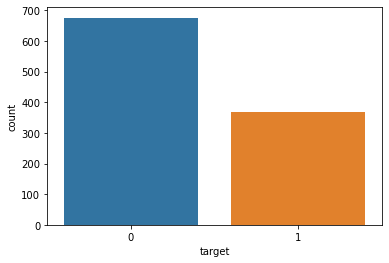

In [118]:
sns.countplot(data=df, x="target");

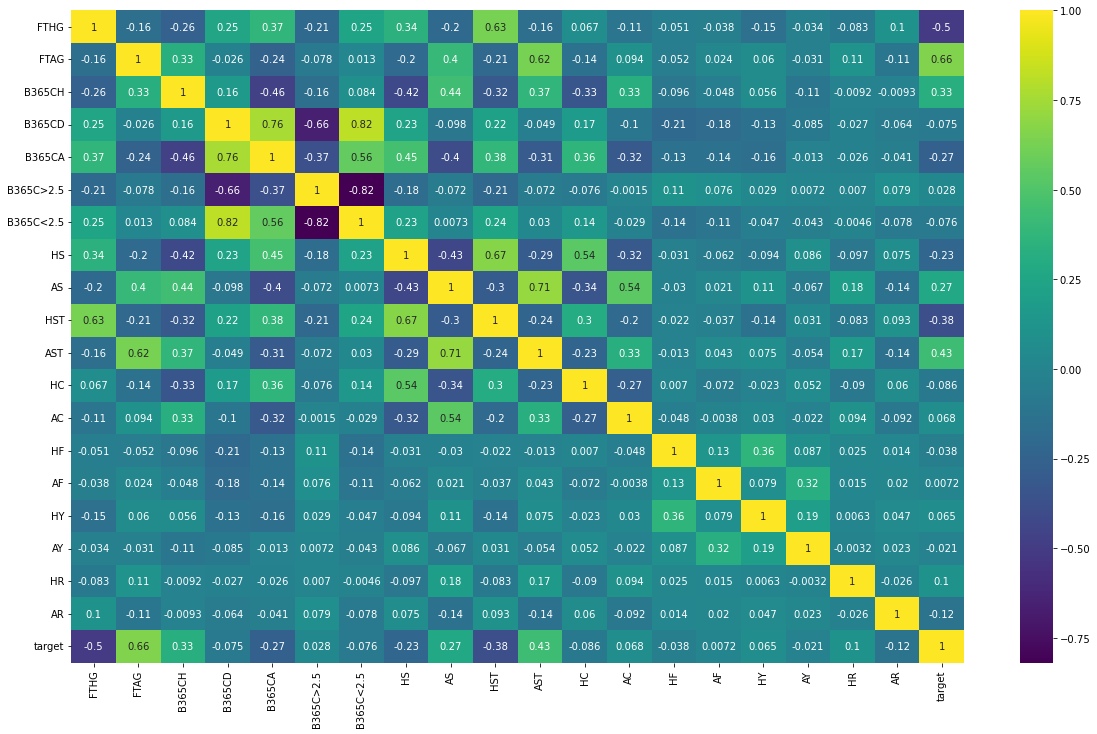

In [119]:
plt.figure(figsize=(20, 12))
sns.heatmap(df.corr(), cmap='viridis', annot=True);

In [120]:
X = df[["B365CH","B365CD","B365CA","B365C>2.5","B365C<2.5",
        "HS","AS","HST","AST","HC","AC","HF","AF","HY","AY","HR","AR"]]

y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train.shape

(835, 17)

In [121]:
model = LogisticRegression()

model.fit(X=X_train, y=y_train)

print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       134
           1       0.74      0.60      0.66        75

    accuracy                           0.78       209
   macro avg       0.77      0.74      0.75       209
weighted avg       0.78      0.78      0.77       209



In [122]:
df["target"].value_counts() / len(df)

0    0.64751
1    0.35249
Name: target, dtype: float64

<AxesSubplot:>

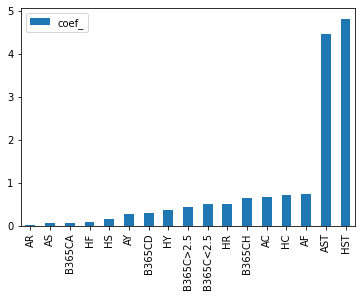

In [77]:
pd.DataFrame(index=X.columns, 
             data=np.abs(model.coef_[0]), 
             columns=["coef_"]).sort_values("coef_").plot(kind="bar")